In [103]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.io import wavfile
from scipy import signal
from IPython.display import Audio
import os

## wav파일을 불러오기
- stereo로 저장된 신호로 complex signal을 재구성하기
- real part와 imaginary part의 파형을 관찰하기
- real part로부터 들리는 소리를 확인하기

In [104]:
mywav = 'Desktop\\hufswav007.wav'
fs, d = wavfile.read(mywav)

sampling frequency:  8000
data shape:  (80000,)
data type:  complex128


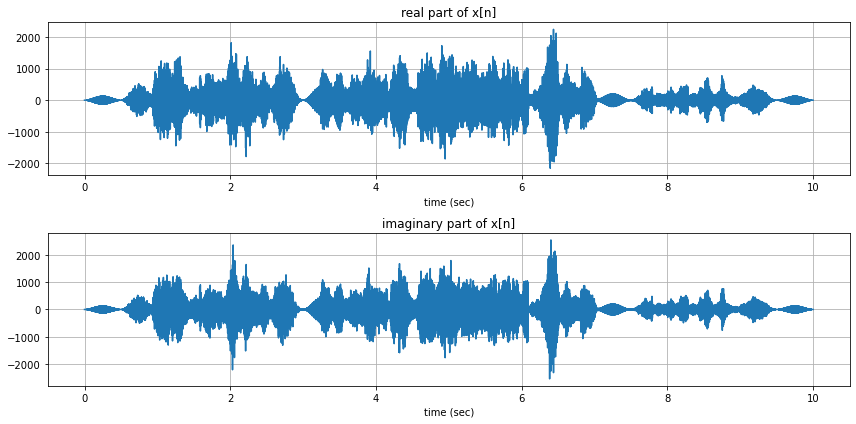

In [105]:
d = d[:,0] + 1j*d[:,1]
t = np.arange(0,len(d))/fs
freq = np.fft.fftfreq(len(t),1/fs)
print("sampling frequency: ",fs)
print("data shape: ",d.shape)
print("data type: ",d.dtype)

plt.figure(figsize=(12,6))
plt.subplot(211)
plt.plot(t,np.real(d))
plt.xlabel('time (sec)')
plt.title('real part of x[n]')
plt.grid('on')
plt.subplot(212)
plt.plot(t,np.imag(d))
plt.xlabel('time (sec)')
plt.title('imaginary part of x[n]')
plt.grid('on')
plt.tight_layout()
plt.show()
Audio(np.real(d), rate=fs)

## Fourier transform을 통해 spectrum을 확인하기

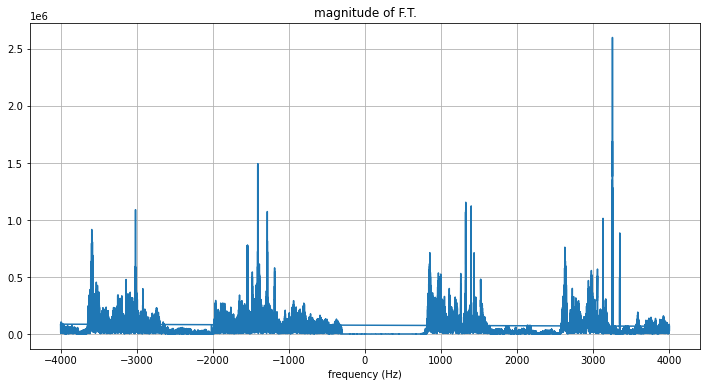

In [106]:
D = np.fft.fft(d)
plt.figure(figsize=(12,6))
plt.plot(freq,np.abs(D))
plt.xlabel('frequency (Hz)')
plt.grid('on')
plt.title('magnitude of F.T.')
plt.show()

## 신호를 분리하여 복원하기
- n명의 학생의 spectrum을 분리하여 원래의 주파수 대역으로 옮겨 복원
- 복원한 n명의 학생의 신호를 d1, ..., dn 으로 저장

In [107]:
fr1= -4000
wr1 = 1800 

hr1 = np.exp(1j*2*np.pi*fr1*t)
HR = np.ones_like(d)
HR[freq<0]=0
HR[freq>wr1]=0
rd1 = d*hr1
RD1 = np.fft.fft(rd1)
RDL1 = RD1*HR
d1 = np.fft.ifft(RDL1)

In [108]:
fr2 =2000 
wr = 2000 

hr2 = np.exp(1j*2*np.pi*fr2*t)
HR = np.ones_like(d)
HR[freq<0]=0
HR[freq>wr]=0
rd2 = d*hr2
RD2 = np.fft.fft(rd2)
RDL2 = RD2*HR
d2 = np.fft.ifft(RDL2)

In [109]:
fr3 = -300
wr = 2000 

hr3 = np.exp(1j*2*np.pi*fr3*t)
HR = np.ones_like(d)
HR[freq<0]=0
HR[freq>wr]=0
rd3 = d*hr3
RD3 = np.fft.fft(rd3)
RDL3 = RD3*HR
d3 = np.fft.ifft(RDL3)

In [110]:
fr4 =-2300 
wr = 2000 

hr4 = np.exp(1j*2*np.pi*fr4*t)
HR = np.ones_like(d)
HR[freq<0]=0
HR[freq>wr]=0
rd4 = d*hr4
RD4 = np.fft.fft(rd4)
RDL4 = RD4*HR
d4 = np.fft.ifft(RDL4)

## 복원된 신호의 time domain, frequency domain 신호를 plot
- 복원한 d1, ..., dn 신호 각각에 대한 time domain과 frequency domain에서의 신호를 plot.

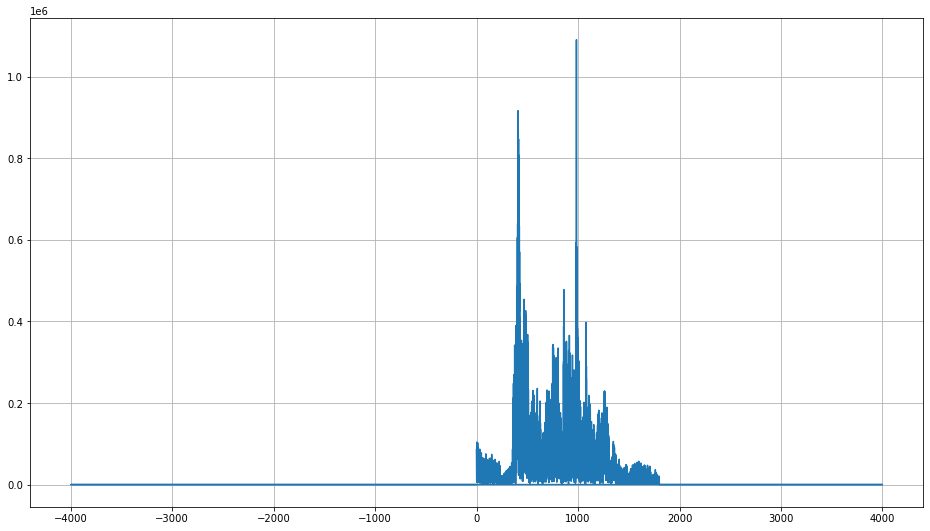

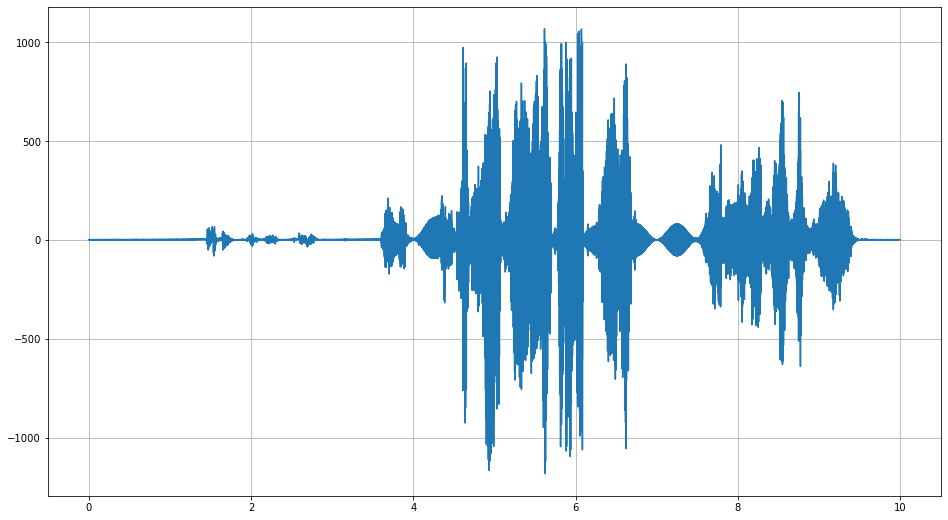

In [111]:
plt.figure(figsize=(16,9))
plt.plot(freq,np.abs(RDL1))
plt.grid('on')
plt.figure(figsize=(16,9))
plt.plot(t,np.real(d1))
plt.grid('on')
plt.show()

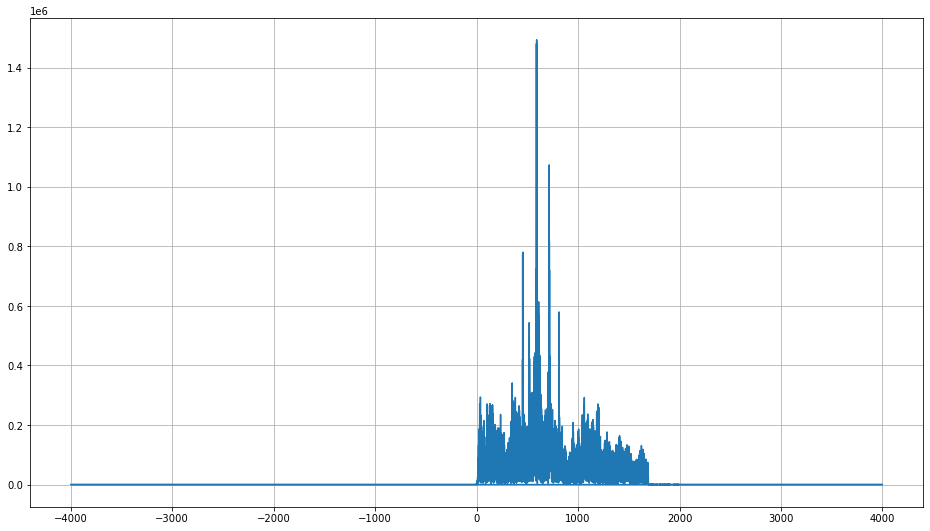

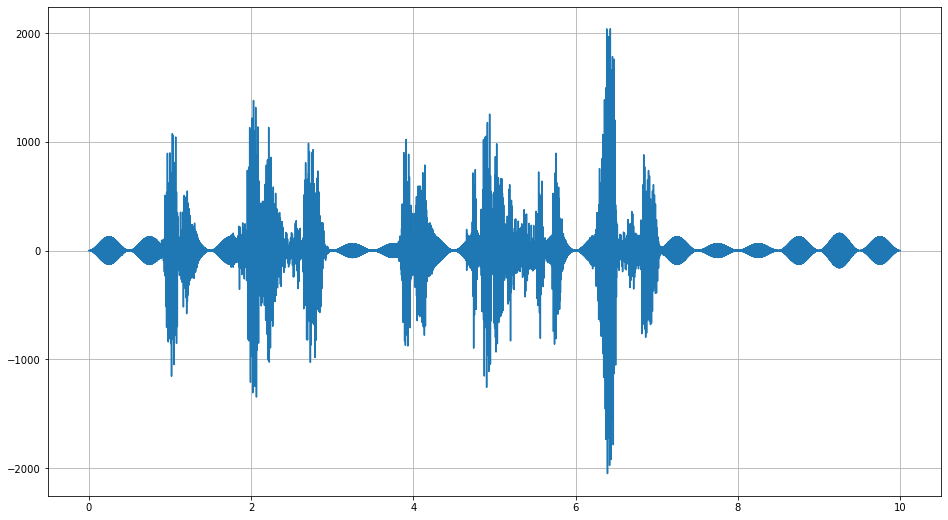

In [112]:
plt.figure(figsize=(16,9))
plt.plot(freq,np.abs(RDL2))
plt.grid('on')
plt.figure(figsize=(16,9))
plt.plot(t,np.real(d2))
plt.grid('on')
plt.show()

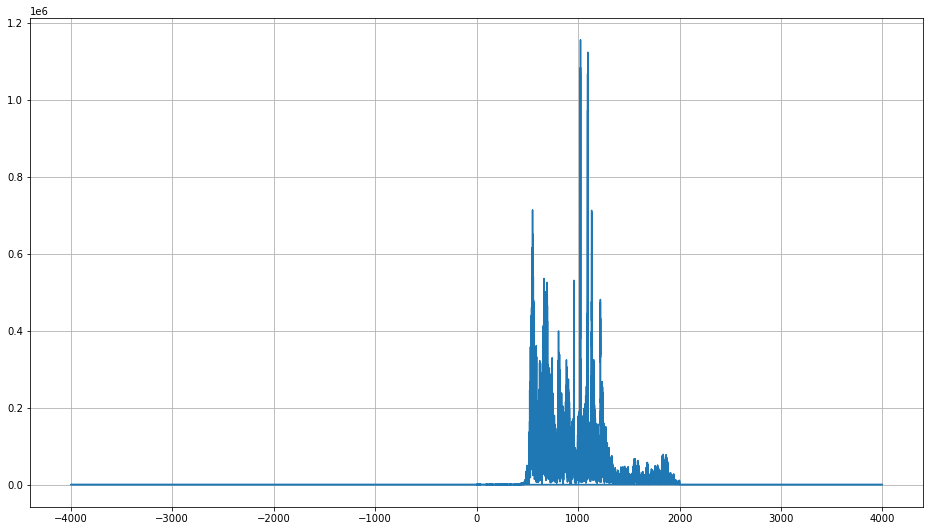

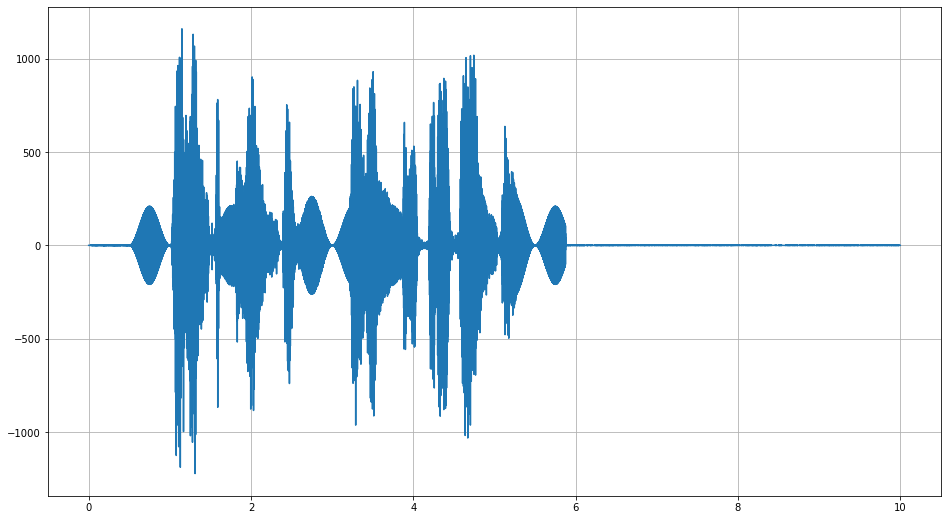

In [113]:
plt.figure(figsize=(16,9))
plt.plot(freq,np.abs(RDL3))
plt.grid('on')
plt.figure(figsize=(16,9))
plt.plot(t,np.real(d3))
plt.grid('on')
plt.show()

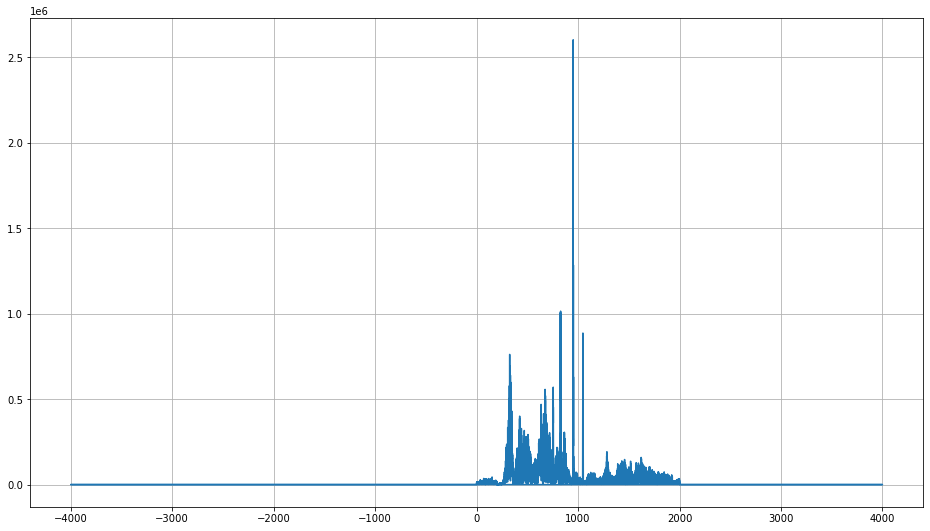

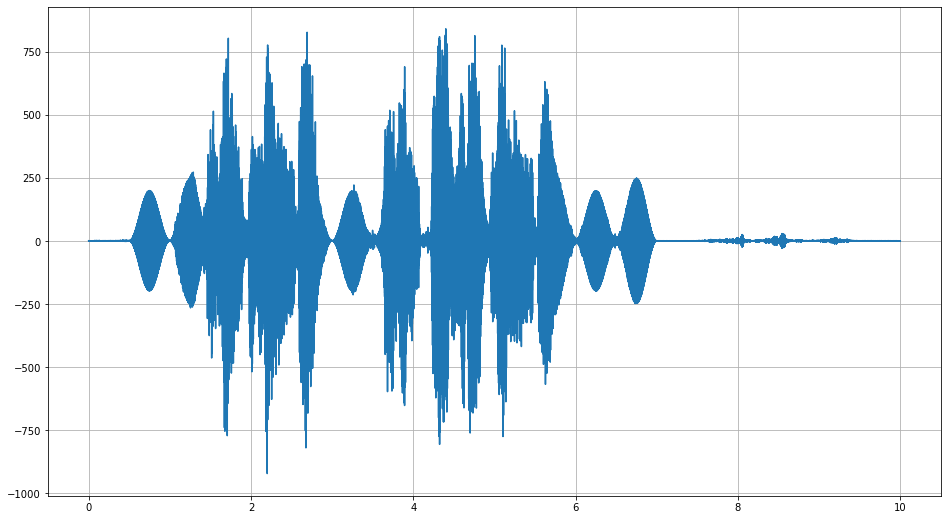

In [114]:
plt.figure(figsize=(16,9))
plt.plot(freq,np.abs(RDL4))
plt.grid('on')
plt.show()
plt.figure(figsize=(16,9))
plt.plot(t,np.real(d4))
plt.grid('on')
plt.show()

## 복원된 신호의 음성 확인
- 복원된 n명의 학생의 음성신호를 확인하여 해당 학생의 이름과 좋아하는 것을 확인
- real part를 취하여 각각의 학생을 d1.wav, ... ,dn.wav 이름으로 저장

In [115]:
Audio(np.real(d1), rate=fs)

In [116]:
wavfile.write("d1.wav",fs, np.real(d1).astype(np.int16))

In [117]:
Audio(np.real(d2), rate=fs)

In [118]:
wavfile.write("d2.wav",fs, np.real(d2).astype(np.int16))

In [119]:
Audio(np.real(d3), rate=fs)

In [120]:
wavfile.write("d3.wav",fs, np.real(d3).astype(np.int16))

In [121]:
Audio(np.real(d4), rate=fs)

In [122]:
wavfile.write("d4.wav",fs, np.real(d4).astype(np.int16))

## 복원에 사용한 과정 설명
- 이 파일들은 모두 modulation을 이용한 주파수 이동을 통해 한 신호에 여러 음성들이 들어가 있는 신호입니다. 그렇기에 Fourier transform을 통하여 주파수 대역을 확인하여 몇 개의 신호가 있는지 먼저 확인하고, 해당 신호의 주파수 대역을 확인합니다. 저는 왼쪽부터 1,2,3,4 순서를 매겨 작성하였습니다. 
- 푸리에 변환을 한 과정에서 신호를 이동시켜 0에 위치하게 한 후, 0부터 1800~2000Hz까지의 신호만을 통과시키는 필터를 통하여 그 신호만 추출하여 inverse Fourier transform을 하여 신호를 복원시킵니다. 
- 즉, frequency domain에서, modulation를 진행한 후, lowpass filter을 통과시키면 신호를 복원할 수 있게 됩니다. 

- 2, 3, 4번째 신호는 명확하게 이름과 좋아하는 것이 들렸으나, 첫번째 신호의 경우에는 웅웅거리는 일정한 소리만 들렸으므로 노이즈의 일환으로 생각하여 알 수 없으며 2,3,4번째 신호는 전부 이름과 좋아하는 것이 명확하게 들리는 상태로 복원을 할 수 있었습니다. 

